<a href="https://colab.research.google.com/github/bwilder95/MIT_Intro_to_ML/blob/main/MIT6_036_hw02_colab_notebook_WILDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Spring 2019: Homework 2#

This colab notebook provides code and a framework for problems 7-10 of [the homework](https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week2/week2_homework/1).  You can work out your solutions here, then submit your results back on the homework page when ready.

## <section>**Setup**</section>

First, download the code distribution for this homework that contains test cases and helper functions (such as `positive`).

Run the next code block to download and import the code for this lab.


In [ ]:
!rm -f code_for_hw02.py*
!wget --no-check-certificate --quiet https://introml_oll.odl.mit.edu/6.036/static/homework/hw02/code_for_hw02.py
from code_for_hw02 import *

Importing code_for_hw02
New procedures added: tidy_plot, plot_separator, plot_data, plot_nonlin_sep, cv,
                      rv, y, positive, score
Data Sets: super_simple_separable_through_origin(), super_simple_separable(), xor(),
           xor_more()
Test data for problem 2.1: data1, labels1, data2, labels2
Test data for problem 2.2: big_data, big_data_labels, gen_big_data(), gen_lin_separable(),
                           big_higher_dim_separable(), gen_flipped_lin_separable()
Test functions: test_linear_classifier(), test_perceptron(), test_averaged_perceptron(),
                test_eval_classifier(), test_eval_learning_alg(), test_xval_learning_alg()

For more information, use 'help', e.g. 'help tidy_plot'
Done with import of code_for_hw02


In [ ]:
help(tidy_plot)

Help on function tidy_plot in module code_for_hw02:

tidy_plot(xmin, xmax, ymin, ymax, center=False, title=None, xlabel=None, ylabel=None)
    Set up axes for plotting
    xmin, xmax, ymin, ymax = (float) plot extents
    Return matplotlib axes



In [ ]:
def test(a):
  return a + 53

In [ ]:
def methodB(a):
  return test(a)

In [ ]:
def someMethod():
  test = 7
  return methodB(test + 3)

In [ ]:
someMethod()

NameError: ignored

# Question 3

In [ ]:
# import numpy
import numpy as np

# build test dataset
data = np.array([[-3,2], [-1,1], [-1,-1],[2,2],[1,-1]]).T
labels = np.array([1,-1, -1,-1,-1])
#print(data)
#print(labels)


In [ ]:

# perceptron function
def perceptron(data, labels , params={}):
    # if T not in params, default to 100
    T = params.get('T', 100)

    d, n = data.shape
    theta = np.zeros((d,1))
    theta_0 = np.zeros(1)
    
    for t in range(T):     
      for i in range(n):
        y = labels[i]
        x = data[:,i]
        
        a = np.dot(x,theta)+theta_0
        #print("a = {}".format(a))
        positive = np.sign(y*a)
        
        if np.sign(y*a) <=0: # update the thetas
          theta[:,0] = theta[:,0]+ y*x
          theta_0 = theta_0 + y
          

    return print("THETA",theta,"                    THETA-NOT",theta_0)

perceptron(data,labels)
print('                                                                         SUCCESS!!! ( ͡ᵔ ͜ʖ ͡ᵔ )')


THETA [[-2.]
 [ 0.]]                     THETA-NOT [-5.]
                                                                         SUCCESS!!! ( ͡ᵔ ͜ʖ ͡ᵔ )


# Question 4

In [ ]:
# import numpy
import numpy as np

# build test dataset
data = np.array([[0,0,0], [0,0,1], [0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]).T
labels = np.array([0,0,0,0,0,0,0,1])*2-1
#print(data)
#print(labels)

# perceptron function
def perceptron(data, labels , params={}):
    # if T not in params, default to 100
    T = params.get('T', 100)

    d, n = data.shape
    theta = np.zeros((d,1))
    theta_0 = np.zeros(1)
    
    for t in range(T):     
      for i in range(n):
        y = labels[i]
        x = data[:,i]
        
        a = np.dot(x,theta) +theta_0
        #print("a = {}".format(a))
        positive = np.sign(y*a)
        
        if np.sign(y*a) <=0: # update the thetas
          theta[:,0] = theta[:,0]+ y*x
          theta_0 = theta_0 + y
          

    return print("THETA",theta,"                    THETA-NOT",theta_0)

perceptron(data,labels)
print('                                                                         did not work!!! ( ͡ᵔ ___ʖ ͡ᵔ )')
print('correct answer should be theta = [1,1,1] and theta-not = -2.5')

THETA [[4.]
 [3.]
 [2.]]                     THETA-NOT [-8.]
                                                                         did not work!!! ( ͡ᵔ ___ʖ ͡ᵔ )
correct answer should be theta = [1,1,1] and theta-not = -2.5


# <section>**7) Implement perceptron**</section>

Implement [the perceptron algorithm](https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Spring/courseware/Week2/perceptron/2), where

* `data` is a numpy array of dimension $d$ by $n$
* `labels` is numpy array of dimension $1$ by $n$
* `params` is a dictionary specifying extra parameters to this algorithm; your algorithm should run a number of iterations equal to $T$
* `hook` is either None or a function that takes the tuple `(th, th0)` as an argument and displays the separator graphically.  We won't be testing this in the Tutor, but it will help you in debugging on your own machine.

It should return a tuple of $\theta$ (a $d$ by 1 array) and $\theta_0$ (a 1 by 1 array).

We have given you some  data sets in the code file for you to test your implementation.

Your function should initialize all parameters to 0, then run through the data, in the order it is given, performing an update to the parameters whenever the current parameters would make a mistake on that data point. Perform $T$ iterations through the data. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.array([[-3,2], [-1,1], [-1,-1],[2,2],[1,-1]]).T
labels = np.array([[1,-1, -1,-1,-1]])

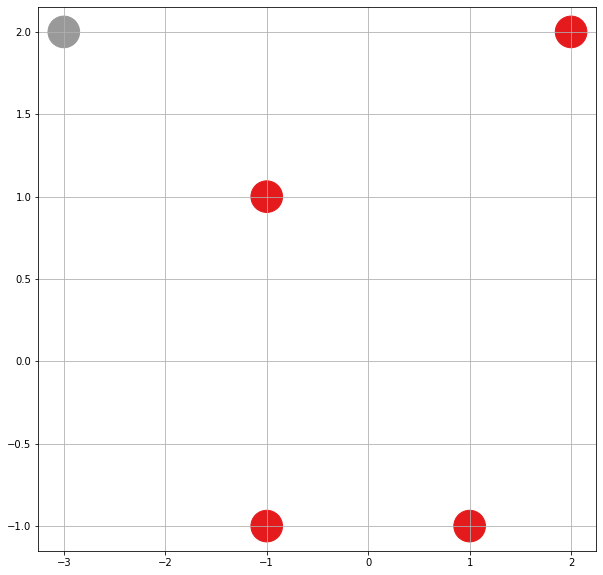

In [ ]:
xd,yd = data
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
ax.scatter(xd, yd, c=labels, cmap='Set1',marker='o',s=1000)
plt.show()

In [ ]:
def perceptron(data, labels, hook, params = {}):    
    # if T not in params, default to 100
    T = params.get('T', 100)
    # Your implementation here
    d, n = data.shape
    theta = np.zeros((d,1))
    theta_0 = np.zeros(1)
  
    for t in range(T):     
      for i in range(n):
        y = labels[0,i]
        x = data[:,i]
        
        a = np.dot(x,theta)+theta_0
        #print("a = {}".format(a))
        positive = np.sign(y*a)
        
        if np.sign(y*a) <=0: # update the thetas
          theta[:,0] = theta[:,0]+ y*x
          theta_0 = theta_0 + y
        
        # hook for plotting
        if t == hook:
          fig, ax = plt.subplots(figsize=(10,10))
          ax.grid(True)
          ax.scatter(xd, yd, c=labels, cmap='Set1',marker='o',s=1000)
          x1 = np.linspace(-3,3,100)
          if theta[1,:] == 0:
            x2 = -theta_0/theta[0,:] +x1*0
            ax.plot(x2, x1, '-r')
            plt.show()
          else:
            x2 = -theta[0,:]/theta[1,:] * x1 - theta_0/theta[1,:]
            ax.plot(x1, x2, '-r')
            plt.show()
          return
        else:
          pass
          
    theta_0 = np.array([theta_0])
    theta = np.array(theta)

    return (theta,theta_0)

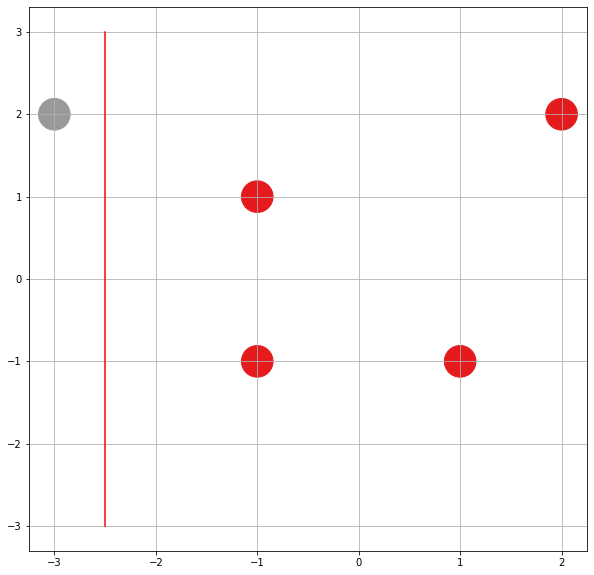

In [ ]:
perceptron(data,labels,hook=4)

# <section>8) Implement averaged perceptron</section>

Regular perceptron can be somewhat sensitive to the most recent examples that it sees. Instead, averaged perceptron produces a more stable output by outputting the average value of `th` and `th0` across all iterations.

Implement averaged perceptron with the same spec as regular perceptron, and using the pseudocode below as a guide.
<pre>
procedure averaged_perceptron({(x^(i), y^(i)), i=1,...n}, T)
    th = 0 (d by 1); th0 = 0 (1 by 1)
    ths = 0 (d by 1); th0s = 0 (1 by 1)
    for t = 1,...,T do:
        for i = 1,...,n do:
	        if y^(i)(th . x^(i) + th0) <= 0 then
              th = th + y^(i)x^(i)
              th0 = th0 + y^(i)
	        ths = ths + th
	        th0s = th0s + th0
    return ths/(nT), th0s/(nT)
</pre>

In [ ]:
def averaged_perceptron(data, labels, params={}, hook=None):
    # if T not in params, default to 100
    T = params.get('T', 100)
    d, n = data.shape
    theta = np.zeros((d,1))
    theta_0 = np.zeros(1)
    ths = np.zeros((d,1))
    th0s = np.zeros(1)
    print("d = {}, n = {}, theta shape = {}, theta_0 shape = {}".format(d,n,theta.shape,theta_0.shape))
  
    for t in range(T):     
      for i in range(n):
        y = labels[0,i]
        x = data[:,i]
        
        a = np.dot(x,theta)+theta_0
        #print("a = {}".format(a))
        positive = np.sign(y*a)
        
        if np.sign(y*a) <=0: # update the thetas
          theta[:,0] = theta[:,0]+ y*x
          theta_0 = theta_0 + y
        
        ths += theta
        th0s += theta_0
        
          
    #print("shape x = {}, y = {}, theta = {}, theta_0 = {}".format(x.shape,y.shape,theta.shape,theta_0.shape))
    return (ths/(n*T),th0s/(n*T))

In [ ]:
test_averaged_perceptron(averaged_perceptron)

d = 2, n = 4, theta shape = (2, 1), theta_0 shape = (1,)
-----------Test Averaged Perceptron 0-----------
Passed! 

d = 2, n = 4, theta shape = (2, 1), theta_0 shape = (1,)
-----------Test Averaged Perceptron 1-----------
Passed! 



# 9) Implement evaluation strategies
  
## 9.1)  Evaluating a classifier

To evaluate a classifier, we are interested in how well it performs on data that it wasn't trained on. Construct a testing procedure that uses a training data set, calls a learning algorithm to get a linear separator (a tuple of $\theta, \theta_0$), and then reports the percentage correct on a new testing set as a float between 0. and 1..

The learning algorithm is passed as a function that takes a data array and a labels vector.  Your evaluator should be able to interchangeably evaluate `perceptron` or `averaged_perceptron` (or future algorithms with the same spec), depending on what is passed through the `learner` parameter.

The `eval_classifier` function should accept the following parameters:

* <tt>learner</tt> - a function, such as perceptron or averaged_perceptron
* <tt>data_train</tt> - training data
* <tt>labels_train</tt> - training labels
* <tt>data_test</tt> - test data
* <tt>labels_test</tt> - test labels

Assume that you have available the function `score` from HW 1, which takes inputs:

* <tt>data</tt>: a <tt>d</tt> by <tt>n</tt> array of floats (representing <tt>n</tt> data points in <tt>d</tt> dimensions)
* <tt>labels</tt>: a <tt>1</tt> by <tt>n</tt> array of elements in <tt>(+1, -1)</tt>, representing target labels
* <tt>th</tt>: a <tt>d</tt> by <tt>1</tt> array of floats that together with
* <tt>th0</tt>: a single scalar or 1 by 1 array, represents a hyperplane

and returns 1 by 1 matrix with an integer indicating number of data points correct for the separator.

In [ ]:
def eval_classifier(learner, data_train, labels_train, data_test, labels_test):
    theta, theta_0 = learner(data_train,labels_train)
    print("theta shape = {}, theta_0 shape = {}, data_test shape = {}".format(theta.shape, theta_0.shape, data_test.shape))
    print(theta)
    # shape = n by 1
    a = np.matmul(data_test.T,theta)+theta_0
    #print("a shape = {}".format(a.shape))
    #print(labels_test)
   
    # shape 1 by n
    predict_labels = np.transpose(np.sign(a))
  
    #print(predict_labels)
    scores = (predict_labels == labels_test)
    #print(scores)
    final_score = np.mean(scores)
    
    return final_score

In [ ]:
test_eval_classifier(eval_classifier,perceptron)

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 30)
[[3.19695273]
 [0.10839974]]
-----------Test Eval Classifier 0-----------
Passed! 

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 30)
[[-2.53272084]
 [ 2.5282913 ]]
-----------Test Eval Classifier 1-----------
Passed! 



## <subsection>9.2) Evaluating a learning algorithm using a data source</subsection>

Construct a testing procedure that takes a learning algorithm and a data source as input and runs the learning algorithm multiple times, each time evaluating the resulting classifier as above. It should report the overall average classification accuracy.

You can use our implementation of `eval_classifier` as above.

Write the function `eval_learning_alg` that takes:

* <tt>learner</tt> - a function, such as perceptron or averaged_perceptron
* <tt>data_gen</tt> - a data generator, call it with a desired data set size; returns a tuple (data, labels)
* <tt>n_train</tt> - the size of the learning sets
* <tt>n_test</tt> - the size of the test sets
* <tt>it</tt> - the number of iterations to average over

and returns the average classification accuracy as a float between 0. and 1..  

** Note: Be sure to generate your training data and then testing data in that order, to ensure that the pseudorandomly generated data matches that in the test code. **

In [ ]:
def eval_learning_alg(learner, data_gen, n_train, n_test, it):
    score = 0
    for i in range(it):
        data_train, labels_train = data_gen(n_train)
        data_test, labels_test = data_gen(n_test) 
        score_i = eval_classifier(learner, data_train, labels_train, data_test, labels_test)
        print("score_i = {}".format(score_i))
        
        score+= score_i
    
    return score/it

In [ ]:
test_eval_learning_alg(eval_learning_alg,perceptron)

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 10)
[[0.13368101]
 [0.87537888]]
score_i = 0.5
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 10)
[[-0.40522929]
 [-3.71502634]]
score_i = 0.2
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 10)
[[-3.27116076]
 [ 0.41978856]]
score_i = 0.3
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 10)
[[5.42252635]
 [1.80439054]]
score_i = 0.9
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 10)
[[ 4.42789539]
 [-0.89829134]]
score_i = 0.9
-----------Test Eval Learning Algo-----------
Passed! 



## <subsection>9.3) Evaluating a learning algorithm with a fixed dataset</subsection>

Cross-validation is a strategy for evaluating a learning algorithm, using a single training set of size $n$. Cross-validation takes in a learning algorithm $L$, a fixed data set $\mathcal{D}$, and a parameter $k$. It will run the learning algorithm $k$ different times, then evaluate the accuracy of the resulting classifier, and ultimately return the average of the accuracies over each of the $k$ "runs" of $L$. It is structured like this:

<pre><code>divide D into k parts, as equally as possible;  call them D_i for i == 0 .. k-1
# be sure the data is shuffled in case someone put all the positive examples first in the data!
for j from 0 to k-1:
    D_minus_j = union of all the datasets D_i, except for D_j
    h_j = L(D_minus_j)
    score_j = accuracy of h_j measured on D_j
return average(score0, ..., score(k-1))
</code></pre>

So, each time, it trains on  $k−1$ of the pieces of the data set and tests the resulting hypothesis on the piece that was not used for training.

When $k=n$, it is called *leave-one-out cross validation*.

Implement cross validation **assuming that the input data is shuffled already** so that the positives and negatives are distributed randomly. If the size of the data does not evenly divide by k, split the data into n % k sub-arrays of size n//k + 1 and the rest of size n//k. (Hint: You can use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_split.html">numpy.array_split</a>
and <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html">numpy.concatenate</a> with axis arguments to split and rejoin the data as you desire.)

Note: In Python, n//k indicates integer division, e.g. 2//3 gives 0 and 4//3 gives 1.

In [ ]:
def xval_learning_alg(learner, data, labels, k):
    # split data
    data_split = np.array_split(data,k)
    labels_split = np.array_split(labels,k)
   

    # shuffle data
    #np.random.shuffle(data_split)
    #np.random.shuffle(labels_split)
    print("k = {}, len of split = {}".format(k,len(data)))
    
    for i in range(k):
      D = data_split
       = print(data_split[i])
      h_j = learner(D)

In [ ]:
test_xval_learning_alg(xval_learning_alg,perceptron)

In [ ]:
import numpy as np
def xval_learning_alg(learner, data, labels, k):
    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)

    score_sum = 0
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test)
    return score_sum/k

## 10) Testing

In this section, we compare the effectiveness of perceptron and averaged perceptron on some data that are not necessarily linearly separable.

Use your `eval_learning_alg` and the `gen_flipped_lin_separable` generator in the code file to evaluate the accuracy of `perceptron` vs. a`veraged_perceptron`. `gen_flipped_lin_separable` can be called with an integer to return a data set and labels. Note that this generates linearly separable data and then "flips" the labels with some specified probability (the argument pflip); so most of the results will not be linearly separable. You can also specifiy pflip in the call to the generator. You should use the default values of th and th_0 to retain consistency with the Tutor.

Run enough trials so that you can confidently predict the accuracy of these algorithms on new data from that same generator; assume training/test sets on the order of 20 points. The Tutor will check that your answer is within 0.025 of the answer we got using the same generator.

In [ ]:
print(eval_learning_alg(perceptron, gen_flipped_lin_separable(pflip=.1), 20, 20, 5))

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-3.56286081]
 [ 5.71728979]]
score_i = 0.6
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[3.88352698]
 [4.9265647 ]]
score_i = 0.85
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[1.52095925]
 [7.62945569]]
score_i = 0.8
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[6.28568425]
 [4.30182603]]
score_i = 0.65
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.40353125]
 [2.56275726]]
score_i = 0.8
0.74


In [ ]:
print(eval_learning_alg(averaged_perceptron, gen_flipped_lin_separable(pflip=.1), 20, 20, 5))

d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[-0.40186683]
 [ 3.55867447]]
score_i = 0.65
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.72500502]
 [3.28061496]]
score_i = 0.95
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.94975224]
 [1.78181932]]
score_i = 0.8
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[1.85270039]
 [3.5940158 ]]
score_i = 0.9
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[1.41884388]
 [3.05024691]]
score_i = 0.8
0.8200000000000001


In [ ]:
print(eval_learning_alg(perceptron, gen_flipped_lin_separable(pflip=.25), 20, 20, 100))

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-1.72714746]
 [ 3.07243309]]
score_i = 0.65
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-0.15312063]
 [-4.00805207]]
score_i = 0.2
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[0.4183077]
 [1.8609032]]
score_i = 0.7
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[4.81822893]
 [0.45453841]]
score_i = 0.85
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-2.47397639]
 [ 3.7031473 ]]
score_i = 0.65
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[ 1.86000341]
 [-1.90011629]]
score_i = 0.35
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.16024576]
 [3.86398511]]
score_i = 0.8
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-1.21814889]
 [ 0.19883862]]
score_i = 0.45
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2,

In [ ]:
print(eval_learning_alg(averaged_perceptron, gen_flipped_lin_separable(pflip=.25), 20, 20, 100))

d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[ 2.7501197 ]
 [-1.41742926]]
score_i = 0.55
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[0.34004805]
 [1.68032722]]
score_i = 0.45
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.90985899]
 [1.77033351]]
score_i = 0.7
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[8.05237797]
 [7.52674606]]
score_i = 0.85
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.43474878]
 [3.42456478]]
score_i = 0.55
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[0.8275196

In [ ]:
def eval_learning_alg(learner, data_gen, n_train, n_test, it):
    score = 0
    for i in range(it):
        data_train, labels_train = data_gen(n_train)
        data_test, labels_test = data_train, labels_train
        score_i = eval_classifier(learner, data_train, labels_train, data_test, labels_test)
        print("score_i = {}".format(score_i))
        
        score+= score_i
    
    return score/it

In [ ]:
print(eval_learning_alg(perceptron, gen_flipped_lin_separable(pflip=.10), 20, 20, 100))

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.24152399]
 [3.43280721]]
score_i = 0.95
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[1.13613734]
 [5.39210943]]
score_i = 0.9
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[11.00344993]
 [ 8.05829015]]
score_i = 0.75
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[4.17368018]
 [8.49884989]]
score_i = 1.0
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[1.97437765]
 [7.53129177]]
score_i = 1.0
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[1.05858457]
 [1.42652369]]
score_i = 0.6
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[3.49983301]
 [6.03301319]]
score_i = 0.85
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[5.36881175]
 [0.58384702]]
score_i = 0.85
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[

In [ ]:
print(eval_learning_alg(averaged_perceptron, gen_flipped_lin_separable(pflip=.10), 20, 20, 100))

d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[11.05884494]
 [12.74598339]]
score_i = 1.0
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[-0.52968953]
 [ 1.54068719]]
score_i = 0.7
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.91594335]
 [3.17672581]]
score_i = 1.0
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[-0.31968652]
 [ 7.76151643]]
score_i = 0.95
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[2.22308844]
 [4.03817306]]
score_i = 0.85
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[3.33952

In [ ]:
print(eval_learning_alg(averaged_perceptron, gen_flipped_lin_separable(pflip=.25), 20, 20, 100))

d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[-1.90928401]
 [ 0.09830047]]
score_i = 0.65
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[0.48488125]
 [2.68655339]]
score_i = 0.8
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[-0.70719804]
 [ 5.1035274 ]]
score_i = 0.85
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[1.65803481]
 [3.06616378]]
score_i = 0.75
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[0.02261065]
 [1.50982588]]
score_i = 0.6
d = 2, n = 20, theta shape = (2, 1), theta_0 shape = (1,)
theta shape = (2, 1), theta_0 shape = (1,), data_test shape = (2, 20)
[[0.095679

In [ ]:
print(eval_learning_alg(perceptron, gen_flipped_lin_separable(pflip=.25), 20, 20, 100))

theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.9167494]
 [2.8795923]]
score_i = 0.75
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[3.1066644 ]
 [6.24620177]]
score_i = 0.75
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.22816898]
 [0.67617809]]
score_i = 0.7
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[2.61570465]
 [3.23650944]]
score_i = 0.8
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[4.88538366]
 [0.72313303]]
score_i = 0.6
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[0.38534417]
 [4.38417203]]
score_i = 0.75
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-0.30474669]
 [ 3.85299501]]
score_i = 0.75
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[3.3481666 ]
 [1.33105412]]
score_i = 0.4
theta shape = (2, 1), theta_0 shape = (1, 1), data_test shape = (2, 20)
[[-0